## Import Libraries

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

## Image Segmentation

In [2]:
img = cv2.imread('dataset/test/01.bmp')
img_hsv = cv2.cvtColor( img , cv2.COLOR_BGR2HSV)
img_ycrcb = cv2.cvtColor( img, cv2.COLOR_BGR2YCrCb)
img_lab = cv2.cvtColor( img, cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor( img, cv2.COLOR_BGR2YUV)
img_luv = cv2.cvtColor( img, cv2.COLOR_BGR2LUV)

# Hair

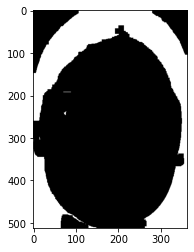

In [3]:
import cv2 as cv
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations =1)
hair = cv.erode(opening,kernel,iterations= 3)
hair_area = np.array(hair)
hair_area[110:420,70:307] = (0)
hair_area[hair_area==255] = 1
plt.imshow(hair,cmap="gray")

# Background

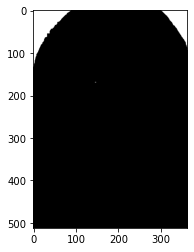

In [4]:
lower_background  = np.array([160,121,128])
upper_background  = np.array([230,148,170])
mask_bg = cv2.inRange(img_lab, lower_background ,upper_background )
#mask_bg = cv2.inRange(img_ycrcb, lower_pink,upper_pink)
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(mask_bg,kernel,iterations= 1)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel, iterations=4)
bg = np.array(closing)
bg[100:380,148:307] = (0)
plt.imshow(bg,cmap="gray")
#set value to zero
bg[bg==255] = 0

# Eye

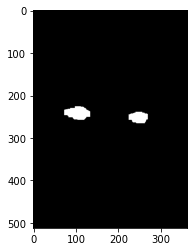

In [5]:

mask = np.zeros((img_hsv.shape), np.uint8)
contours = np.array( [ [50,216], [50,300],[323,300],[323, 216]] )
cv2.fillPoly(mask,[contours],255)
eye_mask = cv2.inRange(mask,1,255)
eyes = cv2.bitwise_and(img_hsv,img_hsv,mask=eye_mask)
lower_eyes = np.array([5,0,0])
upper_eyes = np.array([100,100,100])

mask_eyes = cv2.inRange(eyes, lower_eyes, upper_eyes)
eye = cv2.bitwise_and(mask_eyes,mask_eyes, mask=mask_eyes)
eye = cv2.morphologyEx(eye, cv2.MORPH_CLOSE, kernel, iterations=4)
eye = cv2.erode(eye,kernel,iterations = 2)
eye = cv2.dilate(eye,kernel,iterations = 6)
eye[eye==255] = 3
plt.imshow(eye,cmap="gray")

# Eyebrow

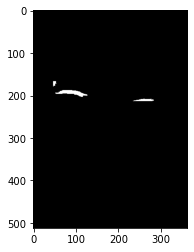

In [6]:
mask = np.zeros((img.shape), np.uint8)
contours = np.array( [ [44,164], [44,216],[318, 216],[318,164]] )
cv2.fillPoly(mask,[contours],255)
eyebrow_mask = cv2.inRange(mask,1,255)
eyebrows = cv2.bitwise_and(img,img,mask=eyebrow_mask)
lower_eyebrow = np.array([5,0,0])
upper_eyebrow = np.array([100,100,100])

mask_eyebrow = cv2.inRange(eyebrows, lower_eyebrow, upper_eyebrow)

eyebrow = cv2.bitwise_and(mask_eyebrow,mask_eyebrow, mask=mask_eyebrow)
eyebrow = cv2.erode(eyebrow,kernel,iterations = 3)
eyebrow[eyebrow==255] = 1
plt.imshow(eyebrow,cmap="gray")

# Skin

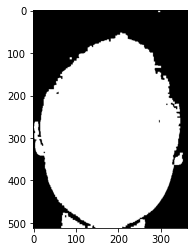

In [7]:
lower_skin = np.array([4,50,90])
upper_skin = np.array([15,144,195])
mask_skin = cv2.inRange(img_hsv, lower_skin, upper_skin)
skin = cv2.bitwise_and(mask_skin,mask_skin, mask=mask_skin)
skin = cv2.morphologyEx(skin, cv2.MORPH_CLOSE, kernel, iterations=2)
skin = cv2.dilate(skin,kernel,iterations = 3)
skin = cv2.erode(skin,kernel,iterations = 1)
skin_area = np.array(skin)
skin_area[150:440,80:280] = (255)
skin_area[180:300,60:295] = (255)

skin_area[skin_area==255] = 5
plt.imshow(skin_area,cmap="gray")

# Nose

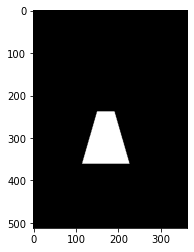

In [8]:
img_gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)

ret2, img4 = cv2.threshold(img_gray, 110, 255, cv2.THRESH_BINARY_INV)
gray = cv2.bilateralFilter(img4, 11, 17, 17)
edges=cv2.Canny(gray,100,200)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(gray, cv2.MORPH_CROSS, kernel)
dilate = cv2.dilate(closed,kernel,iterations = 1)
erosion = cv2.erode(dilate,kernel,iterations = 1)
nose_area = erosion
mask = np.zeros((img.shape), np.uint8)
contours = np.array( [ [150,238], [115,360],[225,360],[190,238]])
cv2.fillPoly(mask,[contours],255)
nose_mask = cv2.inRange(mask,1,255)
nose = cv2.bitwise_and(nose_area,nose_area,mask=nose_mask)

# to near to the groundtruth and get higher accuracy
if cv2.countNonZero(nose) > 3400: #3400 is just a threshold value
    nose = nose_mask
    nose[nose==255] = 4
nose[nose==1] = 4
plt.imshow(nose_mask, cmap='gray')

# Mouth

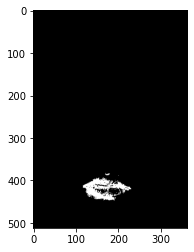

In [9]:

mask = np.zeros((img.shape), np.uint8)
contours = np.array( [ [100,379], [100,420],[135,446],[230,449],[255,420],[255,379]])
cv2.fillPoly(mask,[contours],255)
mouth_mask = cv2.inRange(mask,1,255)
mouth = cv2.bitwise_and(img,img,mask=mouth_mask)
lower_mouth = np.array([24,31,64]) 
upper_mouth = np.array([86,80,158])

mask_mouth = cv2.inRange(mouth, lower_mouth, upper_mouth)

mouth = cv2.bitwise_and(mask_mouth,mask_mouth, mask=mask_mouth)
mouth = cv2.dilate(mouth,kernel,iterations = 1)
mouth = cv2.erode(mouth,kernel,iterations = 1)
mouth[mouth==255] = 2
plt.imshow(mask_mouth,cmap="gray")

# Result

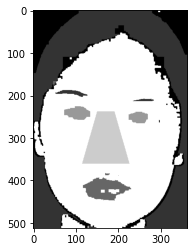

In [10]:
%matplotlib inline

h = hair_area.shape[0]
w = hair_area.shape[1]
hair_skin = hair_area + skin_area
for i in range(h):
    for j in range(w):
        if hair_skin[i,j] == 6:
            hair_skin[i,j] = hair_skin[i,j] - 5
result = (eye) + (hair_skin) + (bg)+ mouth +nose +eyebrow
h = result.shape[0]
w = result.shape[1]
# loop over the image, pixel by pixel
for i in range(h):
    for j in range(w):
        if result[i,j] > 5:
            result[i,j] = result[i,j] - 5
            if result[i,j] > 5:
                result[i,j] = result[i,j] - 2
plt.imshow(result,cmap="gray")